# 1. Getting Started

Diabetes is a chronic metabolic disorder that affects millions of people worldwide and poses a significant public health challenge. Early detection and effective management of diabetes are crucial for reducing complications and improving patient outcomes. 

In this project, we analyze a comprehensive dataset containing demographic, clinical, and laboratory features to develop a predictive model for diabetes diagnosis. The dataset includes key risk factors such as age, body mass index (BMI), blood pressure, blood glucose levels, and comorbidities like hypertension and heart disease. By leveraging various data preprocessing techniques—including missing value imputation, feature engineering, and balancing methods such as SMOTE—we aim to build robust machine learning models that can accurately identify individuals at risk of diabetes.

The ultimate goal of this project is to provide actionable insights for healthcare practitioners and support early intervention strategies, thereby contributing to more effective diabetes prevention and management.

# 2. Domain Knowledge

1. age: Age (years). The risk of diabetes increases with age, as older individuals are generally more susceptible to chronic diseases, including diabetes.  
2. hypertension: Hypertension (0 = No, 1 = Yes). High blood pressure frequently co-occurs with diabetes, and both conditions together significantly increase cardiovascular risk.  
3. heart_disease: Heart Disease (0 = No, 1 = Yes). People with diabetes are at a much higher risk of developing cardiovascular diseases, and the presence of heart disease is a major comorbidity for diabetics.  
4. bmi: Body Mass Index (BMI) (kg/m²). BMI measures body fat based on height and weight. Overweight (BMI ≥ 25) and obesity (BMI ≥ 30) are among the main risk factors for type 2 diabetes.  
5. HbA1c_level: Hemoglobin A1c Level (%). This reflects the average blood glucose level over the past 2–3 months and is a critical biomarker for diagnosing and managing diabetes. An HbA1c level ≥ 6.5% is commonly used as a diagnostic threshold for diabetes.  
6. blood_glucose_level: Blood Glucose Level (mg/dL). This typically refers to fasting or random blood glucose measurement. Elevated blood glucose is a diagnostic criterion for diabetes (e.g., fasting glucose ≥ 126 mg/dL or random glucose ≥ 200 mg/dL).  
7. diabetes: Diabetes Diagnosis Label (0 = No, 1 = Yes). This is the target variable, indicating whether the individual has been diagnosed with diabetes.  

# 3. Introduction

## 3.1 Preface
In this analysis, we have chosen the RamdomForest Classifier as our model. The RandomForest algorithm is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes for classification or mean prediction of the individual trees for regression.
Several reasoms guide our choice of Ramdom Forest for this task:
1. **Handling of Large Data**  
   Random Forests can efficiently handle large datasets with high dimensionality. They are able to process a large number of features and observations without significant loss in performance.

2. **Robustness to Overfitting**  
   By averaging the results of multiple decision trees, Random Forest reduces the risk of overfitting that is common in single decision trees. The ensemble approach ensures that the model generalizes well to unseen data.

3. **Handling Mixed Data Types**  
   Random Forests can naturally work with both numerical and categorical features without the need for extensive preprocessing or encoding. This flexibility makes them suitable for real-world datasets that contain various types of variables.

4. **Feature Importance**  
   Random Forests provide built-in estimates of feature importance, allowing us to identify which variables contribute most to the prediction. This helps with feature selection and enhances the interpretability of the model.

5. **Non-linearity**  
   Unlike linear models, Random Forests can capture complex, non-linear relationships in the data. They are capable of modeling interactions between variables that linear models might miss.

## 3.2 Import libraries

In [ ]:

import warnings
warnings.filterwarnings("ignore")

# import neccessary libraries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import StratifiedKFold

# Set the decimal format；
pd.options.display.float_format = "{:.2f}".format

## 3.3 Input the data

In [49]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [50]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# 4. Exploratory data analysis

## 4.1 Data Quality

### 4.1.1 Handling Duplicates

In [51]:
df.shape

(100000, 9)

In [52]:
duplicate_rows_data = df[df.duplicated()]
print('number of duplicate rows:',duplicate_rows_data.shape)

number of duplicate rows: (3854, 9)


In [53]:
df = df.drop_duplicates()

In [54]:
df.shape

(96146, 9)

### 4.1.2 Uniqueness

In [55]:
# loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:{num_distinct_values} distinct values")

gender:3 distinct values
age:102 distinct values
hypertension:2 distinct values
heart_disease:2 distinct values
smoking_history:6 distinct values
bmi:4247 distinct values
HbA1c_level:18 distinct values
blood_glucose_level:18 distinct values
diabetes:2 distinct values


### 4.1.3 Missing values

In [56]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### 4.1.4 Describe the Data

In [57]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00
mean,41.79,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


### 4.1.5 Remove unreasonable sample

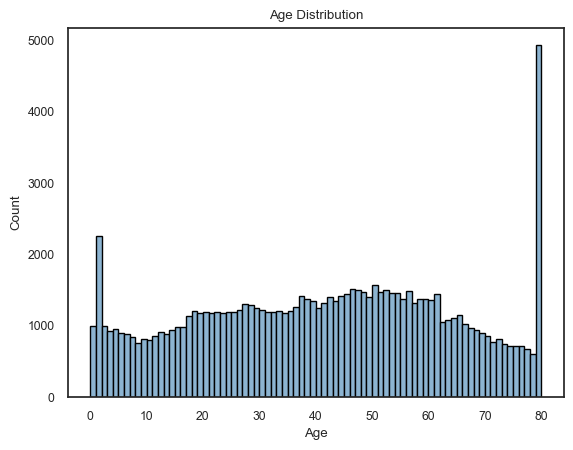

In [58]:
# histogram for age
plt.hist(df['age'],bins=80,edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [59]:
df = df[df['age']>=1]
df.shape

(95236, 9)

We removed samples with age less than 1 year, as infants are highly unlikely to be included in standard diabetes screening populations. Such values are often the result of data entry errors or reflect special cases outside the scope of typical adult diabetes prediction models. This preprocessing step helps to improve data quality and model reliability.

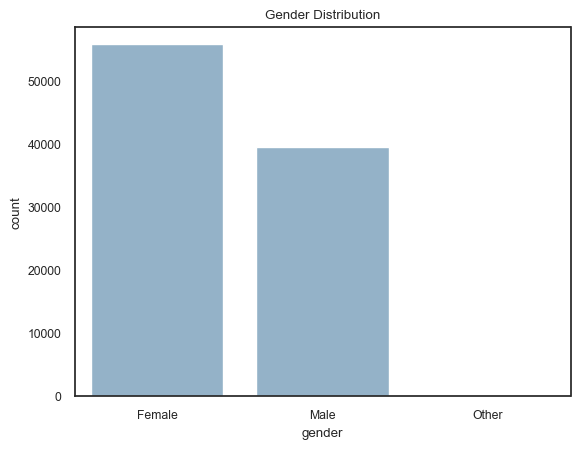

In [60]:
# bar plot for gender
sns.countplot(data=df,x='gender')
plt.title('Gender Distribution')
plt.show()

In [61]:
df = df[df['gender'] != 'Other']
df.shape

(95218, 9)

In this study, we focus on biological sex (male and female), as the relationship between biological sex and diabetes risk is well established in the medical literature. Biological sex is associated with distinct hormonal, metabolic, and physiological differences that can significantly impact the development, progression, and management of diabetes. By concentrating on male and female groups, we ensure that our analysis aligns with current scientific understanding and clinical relevance regarding diabetes risk stratification. 

Samples labeled as "Other" in the gender variable were excluded because this category typically represents a very small and heterogeneous subset, which may introduce statistical noise and is not the focus of established diabetes risk research. This approach enhances the scientific validity and interpretability of our study results.

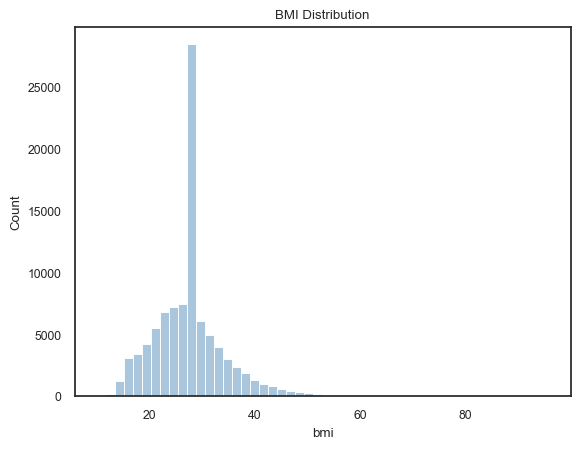

In [62]:
# histogram for BMI
sns.histplot(df['bmi'],bins=50)
plt.title("BMI Distribution")
plt.show()

In [63]:
df = df[df["bmi"]<60]
df.shape

(95102, 9)

Based on the BMI distribution shown above, we removed samples with BMI values greater than or equal to 60. Extremely high BMI values are rare in the general population and are often indicative of data entry errors or outliers that could adversely affect the analysis. Excluding these extreme values helps to improve data quality and ensures that the model is trained on realistic and clinically relevant data.

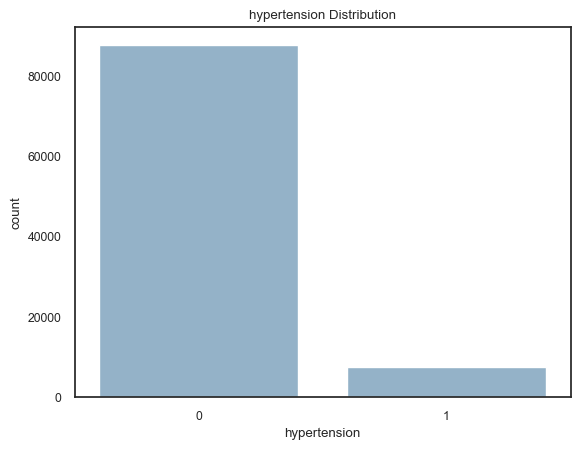

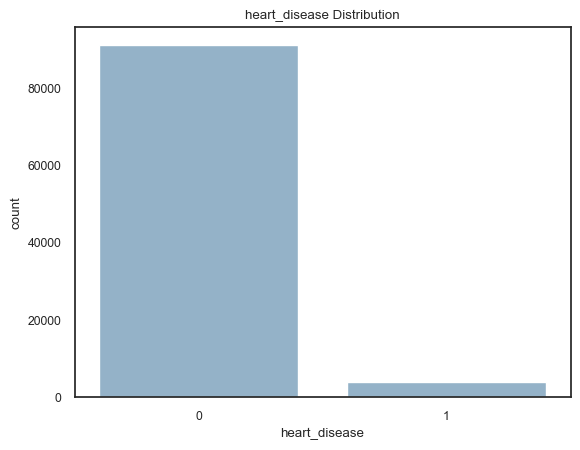

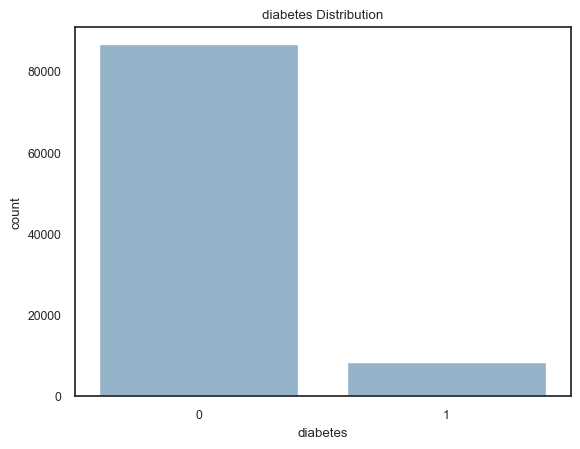

In [64]:
# count plot for binary variables
binary_variables = ["hypertension","heart_disease","diabetes"]
for i in binary_variables:
    sns.countplot(data=df,x=i)
    plt.title(f'{i} Distribution')
    plt.show()

The bar plots for hypertension, heart disease, and diabetes all show highly imbalanced distributions in the dataset:

- **Hypertension**: The vast majority of participants do not have hypertension, while only a small proportion are hypertensive.
- **Heart Disease**: Similarly, most individuals do not have heart disease, with relatively few positive cases.
- **Diabetes**: The dataset contains significantly more non-diabetic individuals than diabetic ones.

These imbalances highlight the challenges for predictive modeling, as the minority classes (positive cases) are underrepresented. Special techniques such as resampling or class weighting are necessary to address the imbalance and ensure that the model can accurately identify individuals at risk for these conditions.

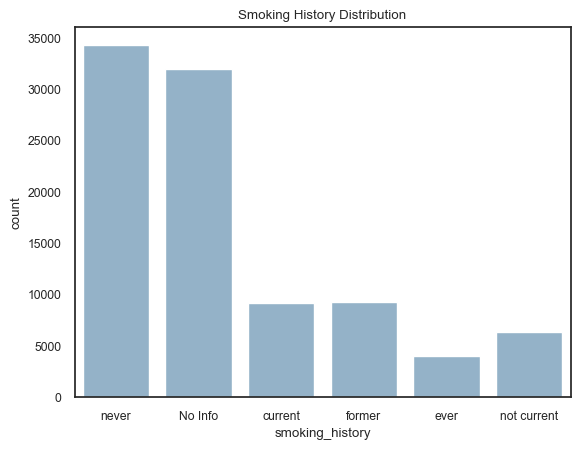

In [65]:
# plot for smoking history
sns.countplot(data=df,x='smoking_history')
plt.title('Smoking History Distribution')
plt.show()

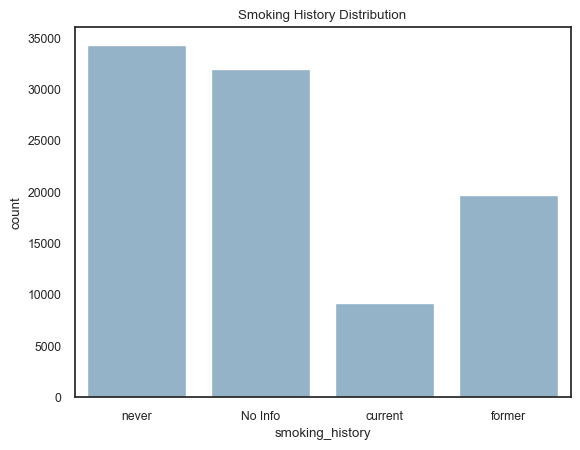

In [66]:
df.loc[df['smoking_history'].isin(["former","ever","not current"]),"smoking_history"]="former"
sns.countplot(data=df,x='smoking_history')
plt.title('Smoking History Distribution')
plt.show()

The first plot of smoking history shows the original distribution of the "smoking_history" variable, which includes several categories such as "never", "No Info", "current", "former", "ever", and "not current". Some of these categories have relatively few samples or represent ambiguous information (e.g., "ever" and "not current").  
To simplify the analysis and improve data consistency, we regrouped the less frequent or overlapping categories—specifically, "former", "ever", and "not current"—into a single "former" category. The second plot displays the revised distribution after this consolidation, resulting in four main groups: "never", "No Info", "current", and "former". This adjustment helps to increase the robustness of downstream modeling and makes the variable more interpretable.

# 5. Bivariative Analysis

## 5.1 Boxplot BMI vs Diabetes classification

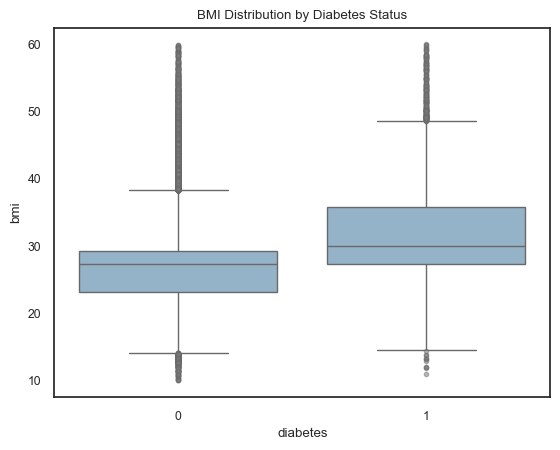

In [67]:
sns.boxplot(data=df, x='diabetes', y='bmi',flierprops=dict(marker='o',markersize=3, linestyle='none', markerfacecolor='gray',alpha=0.5))
plt.title('BMI Distribution by Diabetes Status')
plt.show()

The boxplot illustrates the distribution of BMI for individuals with and without diabetes. It is evident that the median BMI of diabetic patients (diabetes = 1) is higher than that of non-diabetic individuals (diabetes = 0). Moreover, the overall BMI distribution for diabetic patients tends to be shifted toward higher values, with both the median and upper quartile being greater. This suggests a strong association between higher BMI and increased risk of diabetes, which is consistent with established clinical findings.

## 5.2 Boxplot Age vs Diabetes classification

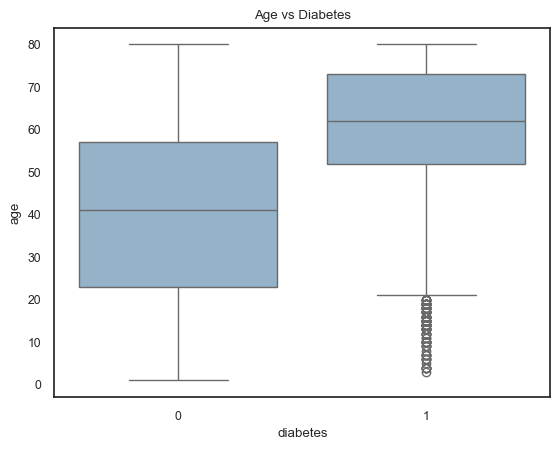

In [68]:
sns.boxplot(data=df,x="diabetes",y="age")
plt.title('Age vs Diabetes')
plt.show()

The boxplot illustrates the age distribution for individuals with and without diabetes. It is clear that diabetic patients (diabetes = 1) tend to be older, with both the median and interquartile range of age being higher than those of non-diabetic individuals (diabetes = 0). This finding supports the well-established clinical observation that the risk of developing diabetes increases with age.

## 5.3 Count plot of gender vs diabetes

In [69]:
grouped = df.groupby(["gender","diabetes"]).size().unstack(fill_value=0)
grouped

diabetes,0,1
gender,,
Female,51228,4419
Male,35429,4026


In [70]:
genders = grouped.index.tolist()
no_diabetes = grouped[0].tolist()
yes_diabetes = grouped[1].tolist()
print(genders)
print(no_diabetes)
print(yes_diabetes)

['Female', 'Male']
[51228, 35429]
[4419, 4026]


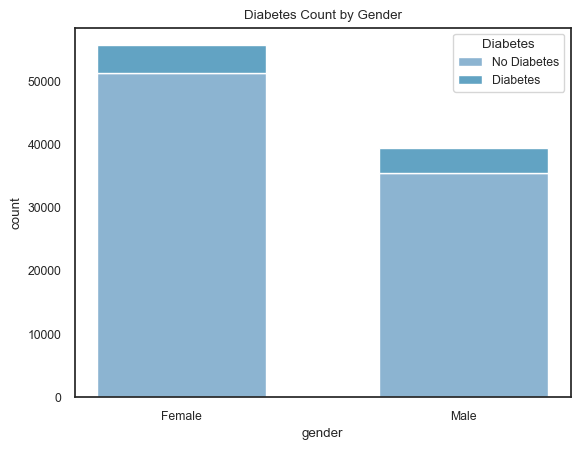

In [71]:
x = np.arange(len(genders))
width = 0.6
plt.bar(x,no_diabetes,width,label="No Diabetes")
plt.bar(x,yes_diabetes,width,bottom=no_diabetes,label="Diabetes")
plt.xticks(x,genders)
plt.xlabel("gender")
plt.ylabel("count")
plt.title('Diabetes Count by Gender')
plt.legend(title='Diabetes')
plt.show()


The count plot shows the distribution of diabetes status by gender. In both female and male groups, the number of non-diabetic individuals (blue) greatly exceeds the number of diabetic individuals (orange), reflecting the class imbalance present in the dataset.  
It is also observed that there are more females than males in the dataset. And the proportion of diabetes in female is smaller than that of male.

## 5.4 Boxplot HbA1c level vs Diabetes classification

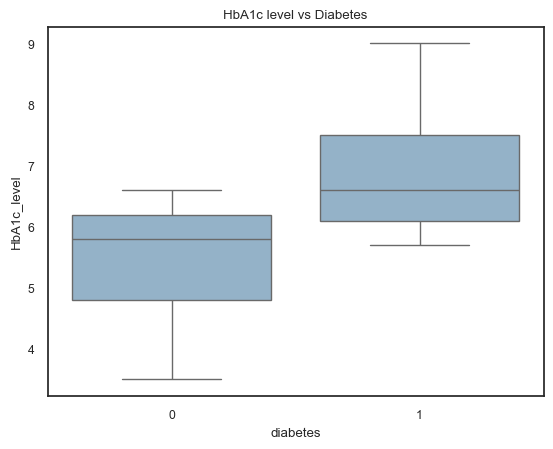

In [72]:
sns.boxplot(data=df,x="diabetes",y='HbA1c_level')
plt.title('HbA1c level vs Diabetes')
plt.show()

The boxplot shows that diabetic patients tend to have significantly higher HbA1c levels compared to non-diabetic individuals. Both the median and the interquartile range for the diabetic group are greater. This is consistent with clinical knowledge, as HbA1c is a key indicator for diabetes diagnosis and management.

## 5.5 Boxplot blood glucose level vs Diabetes classification

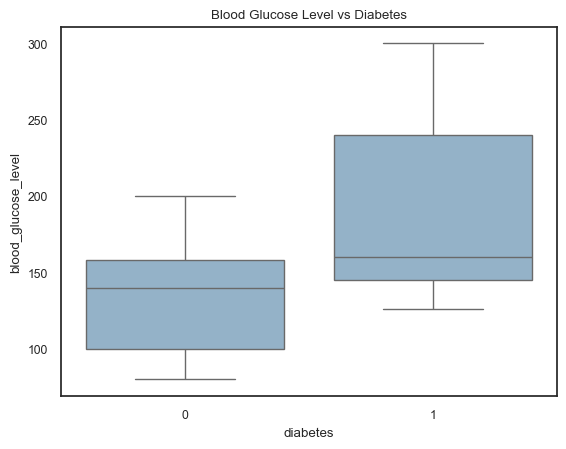

In [73]:
sns.boxplot(data=df,x="diabetes",y="blood_glucose_level")
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

The boxplot indicates that individuals with diabetes have higher blood glucose levels, both in terms of median and overall distribution. This reinforces the association between elevated blood glucose and the presence of diabetes, which is in line with medical criteria for diabetes diagnosis.

## 5.6 Pair plot for numeric features

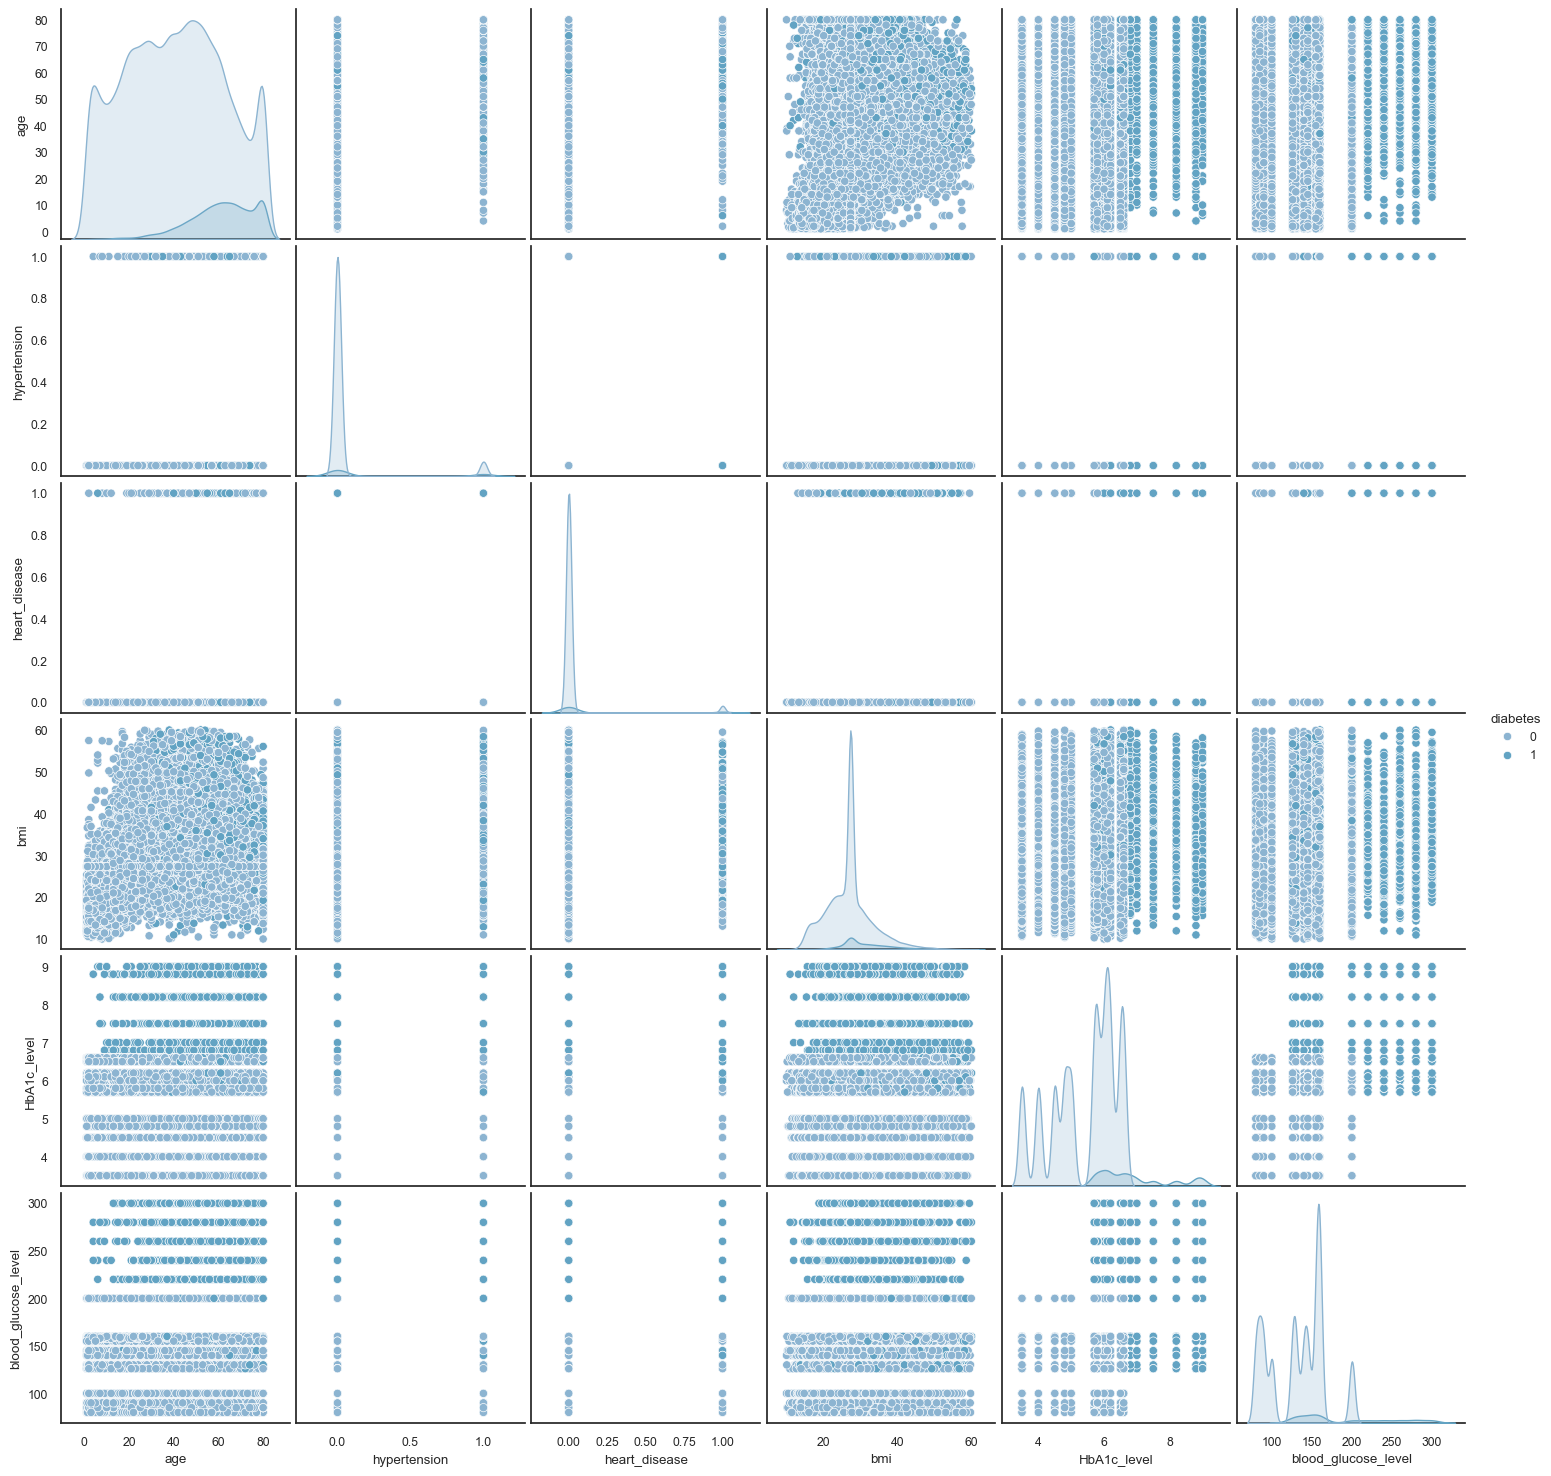

In [74]:
sns.pairplot(df,hue="diabetes")
plt.show()

The pairplot highlights that age, BMI, HbA1c level, blood glucose level, hypertension, and heart disease are all features that have clear differences between diabetic and non-diabetic groups. These variables are worth focusing on in our analysis and modeling.

# 6. Multivariate analysis

## 6.1 Scatterplot Age vs BMI by Diabetes Classification

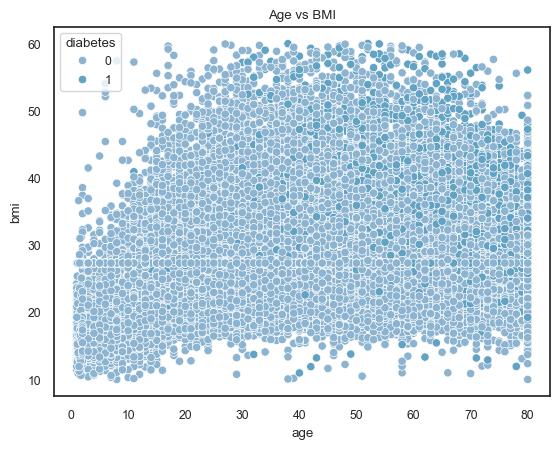

In [75]:
sns.scatterplot(data=df,x="age",y="bmi",hue="diabetes")
plt.title("Age vs BMI")
plt.show()

The scatterplot of age versus BMI, colored by diabetes status, reveals several important trends. Diabetic patients (orange dots) tend to cluster in the upper right region of the plot, corresponding to both higher age and higher BMI values. In contrast, non-diabetic individuals (blue dots) are more widely distributed across lower age and BMI ranges, with the majority concentrated at younger ages and lower BMIs. This visual pattern indicates that the risk of diabetes increases with both age and BMI, and that the combination of these two factors is more predictive of diabetes than either variable alone. Overall, the plot underscores a strong joint association of age and BMI with diabetes risk.

## 6.2 Violin plot of BMI against Diabetes Split by Gender

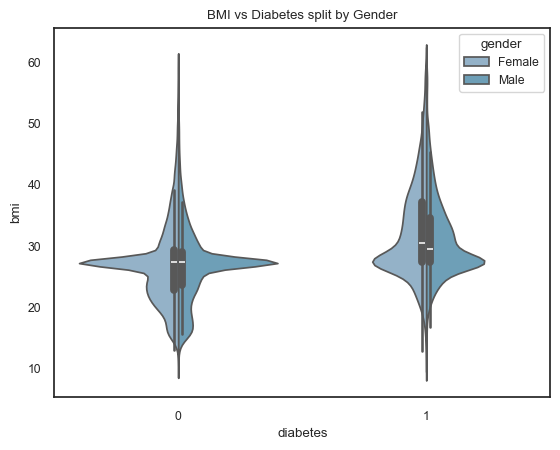

In [76]:
sns.violinplot(data=df,x="diabetes",y="bmi",hue="gender",split=True)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

The violin plot visualizes the distribution of BMI among diabetic and non-diabetic individuals, further split by gender. For both males and females, the BMI distribution shifts higher in the diabetic group compared to the non-diabetic group, with the median and the bulk of the distribution noticeably greater. Additionally, while both genders show this upward shift, the distribution for females tends to be slightly wider, suggesting more variability in BMI among females with diabetes. Overall, this plot highlights that a higher BMI is associated with diabetes in both genders, but also reveals subtle differences in the distribution shape between males and females.

## 6.3 Interaction between gender, age, and diabetes

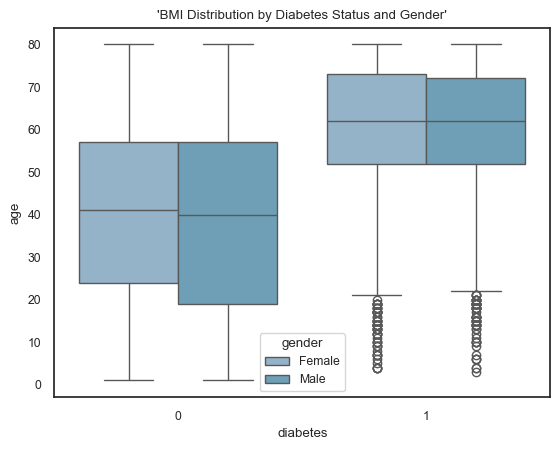

In [77]:
sns.boxplot(data=df,x="diabetes",y="age",hue="gender")
plt.title("'BMI Distribution by Diabetes Status and Gender'")
plt.show()

This boxplot illustrates the interaction between gender, age, and diabetes status. Among non-diabetic individuals (diabetes=0), both males and females have a wide age distribution, but the median age appears lower than that of diabetic individuals. For those with diabetes (diabetes=1), both males and females have noticeably higher median ages, indicating that diabetes is more prevalent among older adults regardless of gender. Additionally, the age distributions of males and females are similar within each diabetes group, suggesting that age is a strong predictor for diabetes in both genders.


# 7. Correlation

## 7.1 Ecoding

We perform one-hot encoding on the categorical variables “gender” and “smoking_history,” converting them into separate binary columns so they can be used in correlation analysis and machine learning models.

In [78]:
# one hot coding for gender and smoking history
def perform_one_hot_coding(df,collumn_name):
    df = pd.get_dummies(df,columns=[collumn_name])
    return df
    




In [79]:
data = perform_one_hot_coding(df,'gender')
data = perform_one_hot_coding(data,"smoking_history")

In [80]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never
0,80.00,0,1,25.19,6.60,140,0,True,False,False,False,False,True
1,54.00,0,0,27.32,6.60,80,0,True,False,True,False,False,False
2,28.00,0,0,27.32,5.70,158,0,False,True,False,False,False,True
3,36.00,0,0,23.45,5.00,155,0,True,False,False,True,False,False
4,76.00,1,1,20.14,4.80,155,0,False,True,False,True,False,False


## 7.2 Correlation

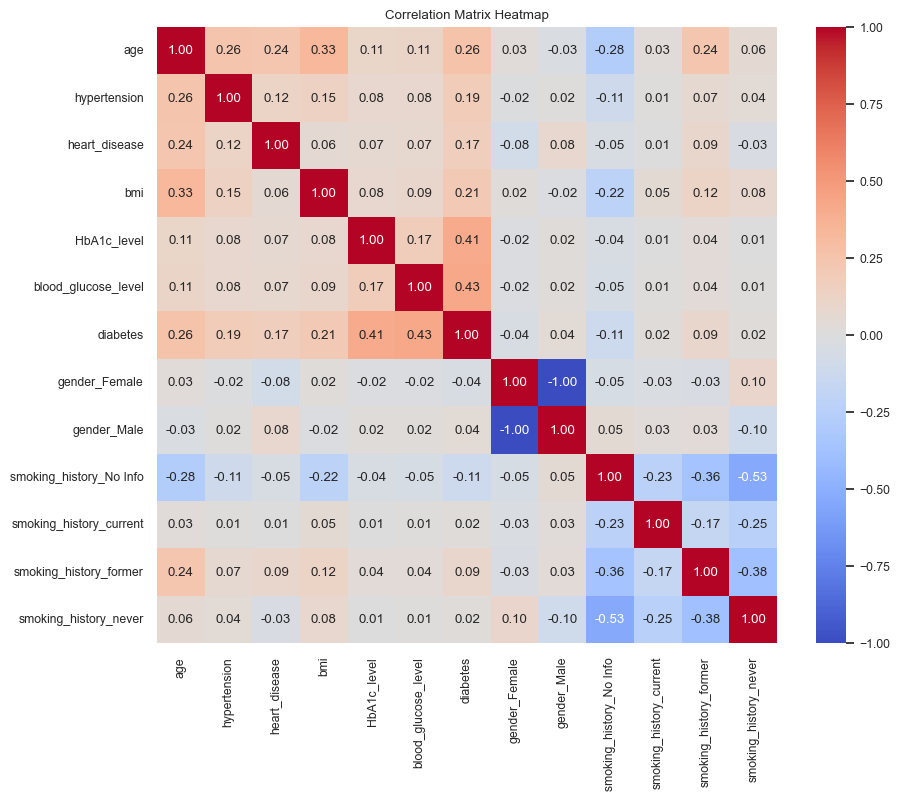

In [81]:
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

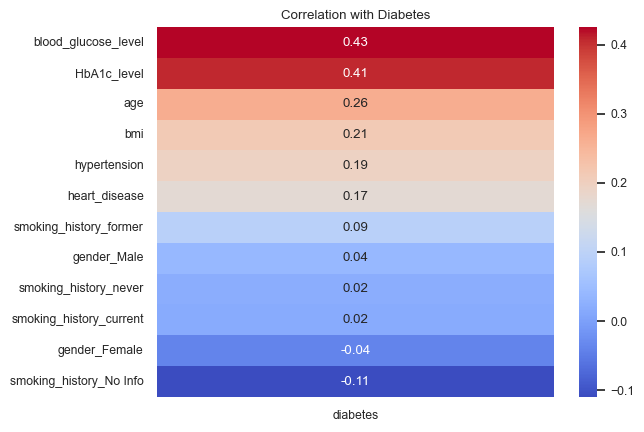

In [82]:
target_corr = corr_matrix["diabetes"].drop("diabetes")
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

This heatmap displays the Pearson correlation coefficients among all features, with values ranging from -1 to 1. Notably, blood_glucose_level (0.43) and HbA1c_level (0.41) show the strongest positive correlations with the diabetes label, indicating that higher values of these variables are strongly associated with diabetes diagnosis. Age (0.26), bmi (0.21), hypertension (0.19), and heart_disease (0.17) also show moderate positive correlations with diabetes. Some variables, such as smoking_history_No Info (-0.11) and gender_Female (-0.04), are negatively correlated with diabetes, suggesting these groups are slightly less likely to be diagnosed with the disease.

In [83]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# 8. Predictive Analysis

## 8.1 Class Imbalance

diabetes
0    86657
1     8445
Name: count, dtype: int64


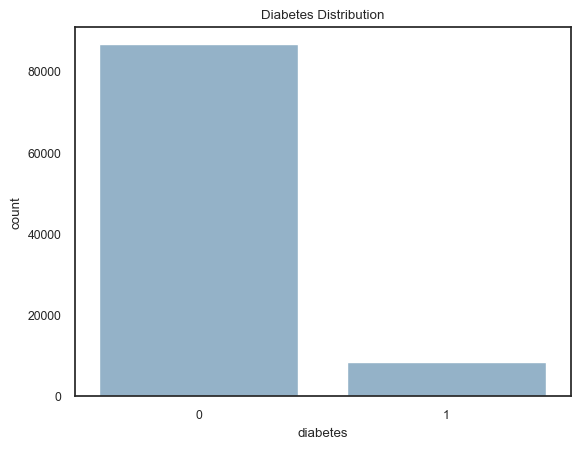

In [84]:
print(df['diabetes'].value_counts())
sns.countplot(data=df,x="diabetes")
plt.title("Diabetes Distribution")
plt.show()

In [85]:
#define resampling
over = SMOTE(sampling_strategy=0.1,random_state=12)
under = RandomUnderSampler(sampling_strategy=0.8)

The plot and table above show a clear class imbalance in the dataset: there are 86,657 non-diabetic samples and only 8,445 diabetic samples, with diabetics accounting for less than 10% of the data. Such a significant imbalance can cause predictive models to be biased toward the majority class and perform poorly on the minority (diabetic) class. To address this, we will apply resampling methods. Specifically, SMOTE to increase the number of diabetic samples, and RandomUnderSampler to reduce the number of non-diabetic samples. This approach helps to balance the dataset, making the classifier more sensitive to both classes and improving its overall performance.

## 8.2 Scaler

In [86]:
# split the dataset
x=df.drop("diabetes",axis=1)
y=df["diabetes"]
print(x.shape)
print(y.shape)
x_temp,x_test,y_temp,y_test = train_test_split(x,y,test_size=0.2,random_state=12)
print(x_temp.shape,y_temp.shape)
x_train,x_valid,y_train,y_valid = train_test_split(x_temp,y_temp,test_size=0.2,random_state=12)
print(x_train.shape,x_valid.shape,x_test.shape)
print(y_train.value_counts())


(95102, 8)
(95102,)
(76081, 8) (76081,)
(60864, 8) (15217, 8) (19021, 8)
diabetes
0    55428
1     5436
Name: count, dtype: int64


In [87]:
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
cat_features = ['gender', 'smoking_history']
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# pipline
clf = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over', over),
    ('under', under),
    ('classifier', RandomForestClassifier(random_state=12))
])

# 9. Model Building and Hyperparameter Tuning

In [88]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)


In [89]:
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           scoring='recall',    
                           cv=5,        
                           n_jobs=-1, 
                           verbose=0)

grid_search.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'HbA1c_level',
                                                                          'blood_glucose_level',
                                                                          'hypertension',
                                                                          'heart_disease']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'smoking_history'])])),
                                       ('over',
                                        SMOTE(random_state=12,
                                              sampling_strategy=0.1)),
                                       ('under',
                                        RandomUnderSampler(sampling_strategy=0.8)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=12))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='recall')

In [90]:
# training set performance
best_model = grid_search.best_estimator_
preprocessor = best_model.named_steps['preprocessor']
smote = best_model.named_steps['over']
under = best_model.named_steps['under']
clf1 = best_model.named_steps['classifier']


x_scaled = preprocessor.transform(x_train)
x_resampled, y_resampled = under.fit_resample(*smote.fit_resample(x_scaled, y_train))
y_pred_resampled = clf1.predict(x_resampled)

print("Model performance after under sampling and smote:")
print(classification_report(y_resampled, y_pred_resampled))

Model performance after under sampling and smote:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6927
           1       0.91      0.94      0.92      5542

    accuracy                           0.93     12469
   macro avg       0.93      0.93      0.93     12469
weighted avg       0.93      0.93      0.93     12469



After sampling, the numbers of class 0 and class 1 samples in the training set are close (with a sampling ratio of approximately 5:4). Both classes have recall and f1-scores above 0.90, indicating that the model performs very well and is well-balanced on the resampled training data. This suggests that the model has learned to distinguish between the positive and negative classes (with an especially high recall for the positive class, recall = 0.94).

In [91]:
# validation set performance
print("validation set performanc:")
y_valid_pred = best_model.predict(x_valid)
print(classification_report(y_valid, y_valid_pred))


validation set performanc:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     13893
           1       0.51      0.89      0.65      1324

    accuracy                           0.92     15217
   macro avg       0.75      0.91      0.80     15217
weighted avg       0.95      0.92      0.93     15217



The recall for the positive class on the validation set remains as high as 0.90, indicating that the model has good generalization ability and there is no obvious overfitting. The precision for the positive class is only 0.51, which suggests that there are quite a few false positives (predicted as 1 but actually 0). But the high recall means there are few missed cases. 

In [92]:
# test set performance
print("test set performance:-")
y_test_pred = best_model.predict(x_test)
print(classification_report(y_test, y_test_pred))

test set performance:-
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     17336
           1       0.50      0.87      0.64      1685

    accuracy                           0.91     19021
   macro avg       0.75      0.89      0.79     19021
weighted avg       0.94      0.91      0.92     19021



In [93]:
print(x_train.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


The performance on the test set is almost identical to the validation set, with the positive class recall slightly decreasing to 0.88 and precision remaining at 0.51. This demonstrates that the model does not overfit to the validation set and has stable generalization ability.

In [94]:
# feature importance
preprocessor = best_model.named_steps['preprocessor']
num_out = num_features
cat_out = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)

all_feature_names = np.concatenate([num_out, cat_out])
importances = best_model.named_steps['classifier'].feature_importances_
feature_importance = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

print("Feature importance ranking:")
print(feature_importance)

Feature importance ranking:
HbA1c_level               0.39
blood_glucose_level       0.30
age                       0.14
bmi                       0.09
hypertension              0.03
heart_disease             0.02
smoking_history_No Info   0.01
smoking_history_former    0.01
gender_Female             0.00
gender_Male               0.00
smoking_history_never     0.00
smoking_history_current   0.00
dtype: float64


The feature importance ranking shows that HbA1c_level and blood_glucose_level are by far the most influential predictors of diabetes in this dataset, with importance scores of 0.39 and 0.29, respectively. This finding is consistent with clinical knowledge, as both HbA1c and blood glucose levels are direct indicators of diabetes status.  
Age (0.15) and BMI (0.09) also contribute to the prediction, indicating that older age and higher body mass index are associated with an increased risk of diabetes.  
Other features, such as hypertension (0.03) and heart_disease (0.02), have relatively minor roles in the model.  
The categorical features related to smoking history and gender have almost no contribution (all close to 0.00), suggesting that, in this dataset, smoking status and gender are not strong independent predictors of diabetes when controlling for the other variables.